In [3]:
# !pip install torchsummary

In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1) #input -? OUtput? RF
        self.conv2 = nn.Conv2d(16, 16, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(16, 32, 3, padding=1) #input -? OUtput? RF
        self.conv4 = nn.Conv2d(32, 10, 3, padding=1)
        # self.pool2 = nn.MaxPool2d(2, 2)

        # self.conv5 = nn.Conv2d(16, 32, 3, padding=1) #input -? OUtput? RF
        # self.conv6 = nn.Conv2d(32, 32, 3, padding=1)
        # self.conv7 = nn.Conv2d(32, 10, 3, padding=1)
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool1(x)

        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)
        # x = self.pool2(x)


        # x = self.conv5(x)
        # x = F.relu(x)
        # x = self.conv6(x)
        # x = F.relu(x)

        # x = self.conv7(x)
        # x = F.relu(x)

        x = F.avg_pool2d(x,x.size()[2:])
        x = x.reshape(-1,10)
        x = F.log_softmax(x, dim=1)
        return x#F.log_softmax(x)

In [6]:
# temp = torch.rand((11,1,28,28))
# needed = model(temp.to(device))

In [7]:


use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
            Conv2d-2           [-1, 16, 28, 28]           2,320
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]           4,640
            Conv2d-5           [-1, 10, 14, 14]           2,890
Total params: 10,010
Trainable params: 10,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.28
Params size (MB): 0.04
Estimated Total Size (MB): 0.32
----------------------------------------------------------------


In [8]:


torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [9]:
device

device(type='cuda')

In [91]:
import statistics

In [105]:
from tqdm.notebook import tqdm
def train(model, device, train_loader, optimizer, epoch):
    loss_tracker = []
    correct = 0
    model.train()
    pbar = tqdm_notebook(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')
        loss_tracker.append(loss.item())
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
    return statistics.mean(loss_tracker),100. * correct / len(train_loader.dataset)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss,100. * correct / len(test_loader.dataset)

In [106]:

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_loss = []
test_loss = []

train_accuracy = []
test_accuracy = []

for epoch in range(1, 19):
    print("Epoch : ",epoch)
    train_epoch_loss,train_epoch_accuracy = train(model, device, train_loader, optimizer, epoch)
    test_epoch_loss,test_epoch_accuracy = test(model, device, test_loader)

    train_loss.append(train_epoch_loss)
    test_loss.append(test_epoch_loss)

    train_accuracy.append(train_epoch_accuracy)
    test_accuracy.append(test_epoch_accuracy)

Epoch :  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  




Test set: Average loss: 1.4369, Accuracy: 5417/10000 (54%)

Epoch :  2




Test set: Average loss: 0.4163, Accuracy: 8649/10000 (86%)

Epoch :  3




Test set: Average loss: 0.2112, Accuracy: 9389/10000 (94%)

Epoch :  4




Test set: Average loss: 0.1586, Accuracy: 9509/10000 (95%)

Epoch :  5




Test set: Average loss: 0.1121, Accuracy: 9654/10000 (97%)

Epoch :  6




Test set: Average loss: 0.1305, Accuracy: 9583/10000 (96%)

Epoch :  7




Test set: Average loss: 0.1050, Accuracy: 9682/10000 (97%)

Epoch :  8




Test set: Average loss: 0.0989, Accuracy: 9691/10000 (97%)

Epoch :  9




Test set: Average loss: 0.1033, Accuracy: 9681/10000 (97%)

Epoch :  10




Test set: Average loss: 0.0903, Accuracy: 9726/10000 (97%)

Epoch :  11




Test set: Average loss: 0.0791, Accuracy: 9765/10000 (98%)

Epoch :  12




Test set: Average loss: 0.0656, Accuracy: 9791/10000 (98%)

Epoch :  13




Test set: Average loss: 0.0748, Accuracy: 9759/10000 (98%)

Epoch :  14




Test set: Average loss: 0.0750, Accuracy: 9766/10000 (98%)

Epoch :  15




Test set: Average loss: 0.0717, Accuracy: 9779/10000 (98%)

Epoch :  16




Test set: Average loss: 0.0792, Accuracy: 9751/10000 (98%)

Epoch :  17




Test set: Average loss: 0.0842, Accuracy: 9733/10000 (97%)

Epoch :  18




Test set: Average loss: 0.0653, Accuracy: 9790/10000 (98%)



In [107]:
sample_test_set = next(iter(test_loader))

In [16]:
import matplotlib.pyplot as plt

In [20]:
img,label = sample_test_set[0][0],sample_test_set[1][0]

label: tensor(9)


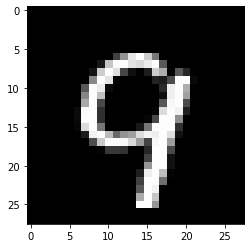

In [21]:
plt.imshow(img.squeeze(), cmap='gray')
print('label:', label)

In [26]:
import torchvision
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels :  tensor([9, 8, 8, 2, 1, 7, 6, 6, 6, 0], device='cuda:0')


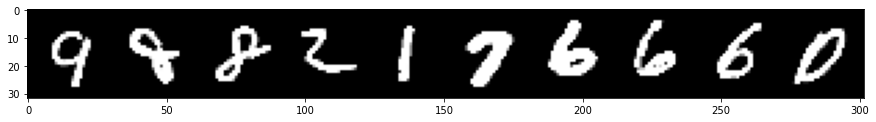

In [33]:
grid = torchvision.utils.make_grid(sample_test_set[0][:10], nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
predictions = model(sample_test_set[0][:10].to(device))
print("labels : ",predictions.argmax(dim=1))

In [77]:
correct_images = []
correct_labels = []
incorrect_images = []
incorrect_labels = []
model.eval()
with torch.no_grad():
    for batch in test_loader:
        images,labels = batch
        predicted_labels = model(images.to(device))
        correct_labels_of_batch = predicted_labels.argmax(dim = 1)[predicted_labels.argmax(dim = 1) == labels.to(device)]
        correct_images_of_batch = images[predicted_labels.argmax(dim = 1) == labels.to(device)]
        correct_labels = correct_labels + correct_labels_of_batch.tolist()
        correct_images = correct_images + correct_images_of_batch.tolist()



        incorrect_labels_of_batch = predicted_labels.argmax(dim = 1)[predicted_labels.argmax(dim = 1) != labels.to(device)]
        incorrect_images_of_batch = images[predicted_labels.argmax(dim = 1) != labels.to(device)]
        incorrect_labels = incorrect_labels + incorrect_labels_of_batch.tolist()
        incorrect_images = incorrect_images + incorrect_images_of_batch.tolist()  

In [78]:
len(correct_images),len(correct_labels)

(9784, 9784)

In [79]:
len(incorrect_images),len(incorrect_labels)

(216, 216)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels: [3, 9, 4, 0, 6, 0, 6, 2, 2, 7, 9, 3, 5, 9, 1, 8, 6, 8, 3, 7, 0, 3, 4, 5, 6]


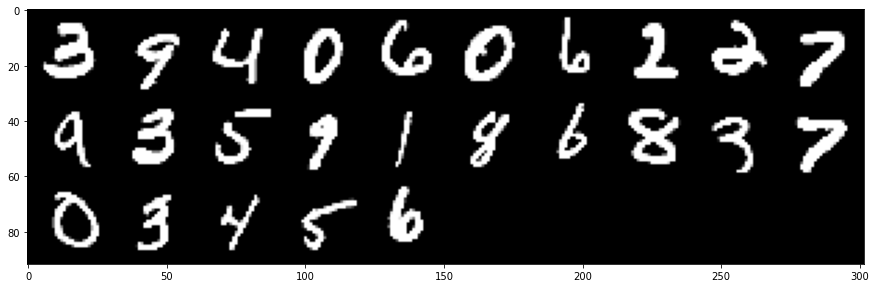

In [80]:
grid = torchvision.utils.make_grid(torch.tensor(correct_images[:25]), nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', correct_labels[:25])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels: [9, 5, 9, 6, 5, 9, 5, 5, 1, 3, 0, 1, 5, 6, 4, 3, 3, 7, 0, 0, 3, 0, 5, 2, 4]


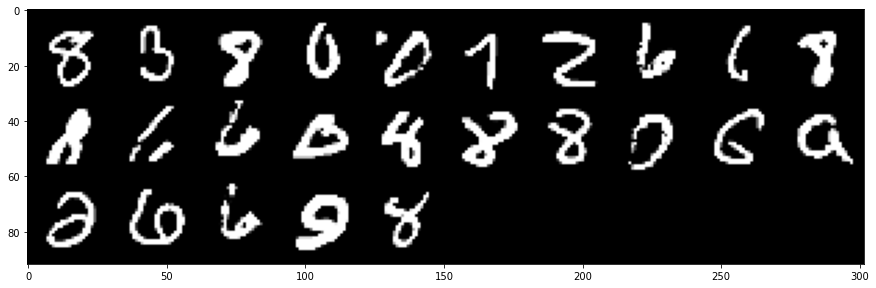

In [81]:
grid = torchvision.utils.make_grid(torch.tensor(incorrect_images[:25]), nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', incorrect_labels[:25])

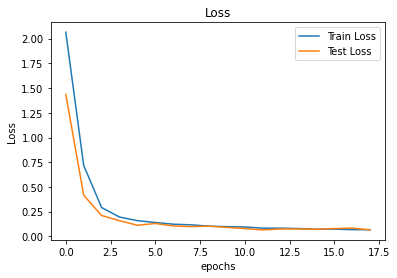

In [108]:
plt.plot(train_loss, label = "Train Loss")
plt.plot(test_loss, label = "Test Loss")
plt.xlabel('epochs')
# naming the y axis
plt.ylabel('Loss')
# giving a title to my graph
plt.title('Loss')
  
# show a legend on the plot
plt.legend()
plt.show()

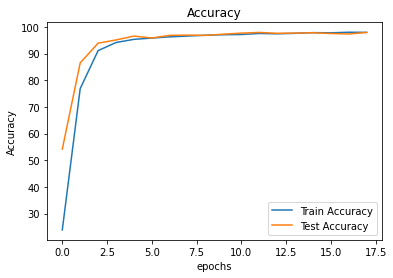

In [110]:
plt.plot(train_accuracy, label = "Train Accuracy")
plt.plot(test_accuracy, label = "Test Accuracy")
plt.xlabel('epochs')
# naming the y axis
plt.ylabel('Accuracy')
# giving a title to my graph
plt.title('Accuracy')
  
# show a legend on the plot
plt.legend()
plt.show()